In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
if not os.path.isdir("data"):
    print("Downloading data!")
    os.makedirs("data")
    !cd data && kaggle datasets download -d ex0ticone/house-prices-of-sao-paulo-city && unzip house-prices-of-sao-paulo-city.zip && rm house-prices-of-sao-paulo-city.zip
    print("Data downloaded!")
else:
    print("Data already downloaded!")

Data already downloaded!


In [3]:
!head data/housing_sp_city.csv

logradouro,numero,bairro,cep,cidade,tipo_imovel,area_util,banheiros,suites,quartos,vagas_garagem,anuncio_criado,tipo_anuncio,preco_venda,taxa_condominio,periodicidade,preco_aluguel,iptu_ano
Rua Juvenal Galeno,53,Jardim da Saúde,04290030,São Paulo,Casa de dois andares,388,3,1,4,6,2017-02-07,Venda,700000,NA,NA,NA,NA
Rua Juruaba,16,Vila Santa Teresa (Zona Sul),04187320,São Paulo,Casa,129,2,1,3,2,2016-03-21,Venda,336000,NA,NA,NA,NA
Avenida Paulista,402,Bela Vista,01311000,São Paulo,Comercial,396,4,0,0,5,2018-12-18,Locação,24929,4900,MONTHLY,29829,4040
Rua Alvorada,1190,Vila Olímpia,04550004,São Paulo,Apartamento,80,2,1,3,2,2018-10-26,Venda,739643,686,NA,NA,1610
Rua Curitiba,380,Paraíso,04005030,São Paulo,Apartamento,3322,5,4,4,5,2018-12-14,Venda,7520099,6230,NA,NA,18900
Rua Pintassilgo,477,Vila Uberabinha,04514032,São Paulo,Flat,45,0,1,1,1,2018-10-09,Locação,1889,560,MONTHLY,2450,87
Rua Mateus Grou,586,Pinheiros,05415040,São Paulo,Apartamento,94,1,0,3,2,2018-05-29,Venda,630700,1120,NA,NA,4

In [4]:
sp_data = pd.read_csv("data/housing_sp_city.csv", encoding="ISO-8859-1")
sp_data.drop(
    sp_data[
        (sp_data["tipo_anuncio"] != "Venda")
        | (
            sp_data["tipo_imovel"].isin(
                ["Casa de dois andares", "Casa", "Apartamento", "Flat", "Kitnet"]
            )
        )
    ].index,
    inplace=True,
)
sp_data.head()

,logradouro,numero,bairro,cep,cidade,tipo_imovel,area_util,banheiros,suites,quartos,vagas_garagem,anuncio_criado,tipo_anuncio,preco_venda,taxa_condominio,periodicidade,preco_aluguel,iptu_ano
7,Rua Dona LuÃ­sa de Paiva Dias,NaN,Vila Santa Clara,3274050.0,SÃ£o Paulo,CondomÃ­nio,110.0,1.0,1.0,3.0,2.0,2018-04-16,Venda,385000,0.0,NaN,NaN,0.0
8,Rua Oswaldo Arouca,213,Vila Formosa,3363000.0,SÃ£o Paulo,DepÃ³sito,590.0,2.0,0.0,0.0,20.0,2018-06-26,Venda,1400000,0.0,NaN,NaN,5600.0
11,Rua Francisco AntÃ´nio GonÃ§alves,30,Jardim Aeroporto,4630020.0,SÃ£o Paulo,Loteamento Residencial,225.0,1.0,0.0,1.0,2.0,2018-03-12,Venda,525000,0.0,NaN,NaN,0.0
14,Rua DemÃ©trio Ribeiro,100,Cidade MÃ£e do CÃ©u,3332000.0,SÃ£o Paulo,Cobertura,275.0,5.0,2.0,4.0,6.0,2017-10-20,Venda,2590000,1400.0,NaN,NaN,11900.0
32,Rua Ilha Maiorca,100,Jardim GuarujÃ¡,5877250.0,SÃ£o Paulo,PrÃ©dio Residencial,50.0,1.0,0.0,2.0,1.0,2018-12-14,Venda,139930,56.0,NaN,NaN,0.0


In [5]:
sp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13657 entries, 7 to 133960
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   logradouro       12782 non-null  object 
 1   numero           8480 non-null   object 
 2   bairro           13653 non-null  object 
 3   cep              12948 non-null  float64
 4   cidade           13657 non-null  object 
 5   tipo_imovel      13657 non-null  object 
 6   area_util        12726 non-null  float64
 7   banheiros        12993 non-null  float64
 8   suites           11628 non-null  float64
 9   quartos          12381 non-null  float64
 10  vagas_garagem    12295 non-null  float64
 11  anuncio_criado   13657 non-null  object 
 12  tipo_anuncio     13657 non-null  object 
 13  preco_venda      13657 non-null  int64  
 14  taxa_condominio  11041 non-null  float64
 15  periodicidade    31 non-null     object 
 16  preco_aluguel    5 non-null      float64
 17  iptu_ano        

In [6]:
sp_data.describe()

,cep,area_util,banheiros,suites,quartos,vagas_garagem,preco_venda,taxa_condominio,preco_aluguel,iptu_ano
count,1.294800e+04,1.272600e+04,12993.000000,11628.000000,12381.000000,12295.000000,1.365700e+04,1.104100e+04,5.0,1.107600e+04
mean,3.488028e+06,5.935097e+02,2.417994,1.019006,1.809466,2.702155,1.439548e+06,8.629950e+02,0.0,1.904118e+03
std,2.013483e+06,1.833983e+04,3.434813,1.468888,5.736314,6.194723,2.911153e+06,2.076296e+04,0.0,3.882285e+04
min,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,7.000000e+03,0.000000e+00,0.0,0.000000e+00
25%,2.313050e+06,7.900000e+01,1.000000,0.000000,0.000000,1.000000,3.283000e+05,0.000000e+00,0.0,0.000000e+00
50%,3.304000e+06,1.700000e+02,2.000000,0.000000,2.000000,2.000000,6.300000e+05,7.000000e+01,0.0,4.900000e+01
75%,4.571090e+06,3.570000e+02,3.000000,2.000000,3.000000,3.000000,1.470000e+06,7.000000e+02,0.0,4.820000e+02
max,8.592680e+07,2.025000e+06,200.000000,42.000000,600.000000,414.000000,8.400000e+07,2.168600e+06,0.0,2.677110e+06


In [7]:
sp_data.describe(include="O")

,logradouro,numero,bairro,cidade,tipo_imovel,anuncio_criado,tipo_anuncio,periodicidade
count,12782,8480,13653,13657,13657,13657,13657,31
unique,4156,1669,925,30,13,1236,1,1
top,Avenida Nova Cantareira,1,Santana,SÃ£o Paulo,CondomÃ­nio,2017-04-13,Venda,MONTHLY
freq,129,198,442,13613,3821,502,13657,31


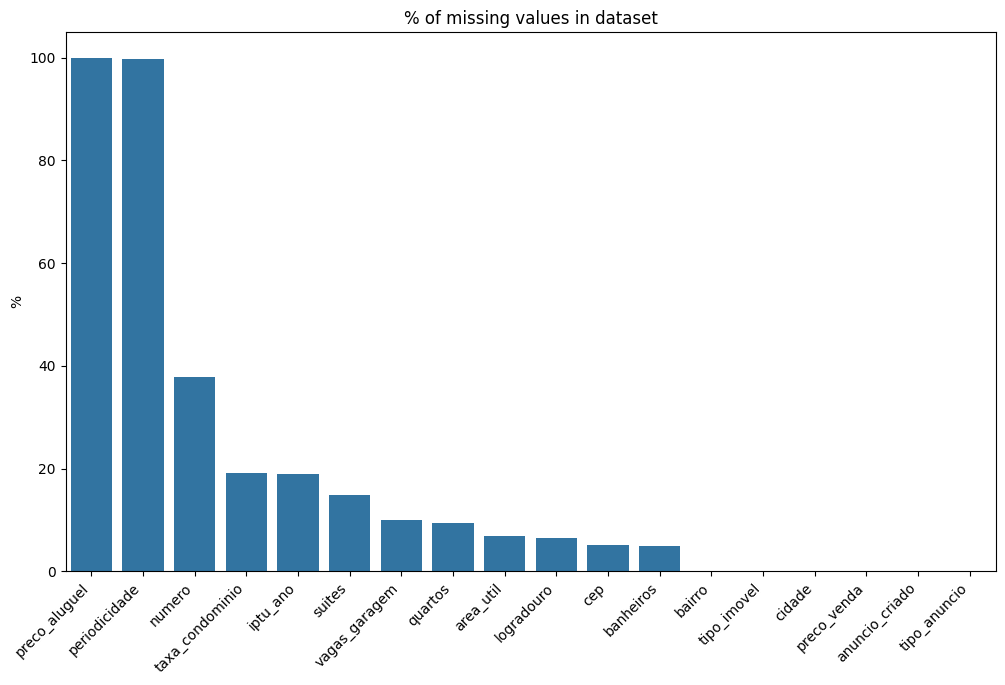

In [9]:
plt.figure(figsize=(12, 7))
sns.barplot((sp_data.isnull().sum() / len(sp_data) * 100).sort_values(ascending=False))
plt.title("% of missing values in dataset")
plt.xticks(rotation=45, ha="right")
plt.ylabel("%")
plt.show()